## Decision Tree Classification
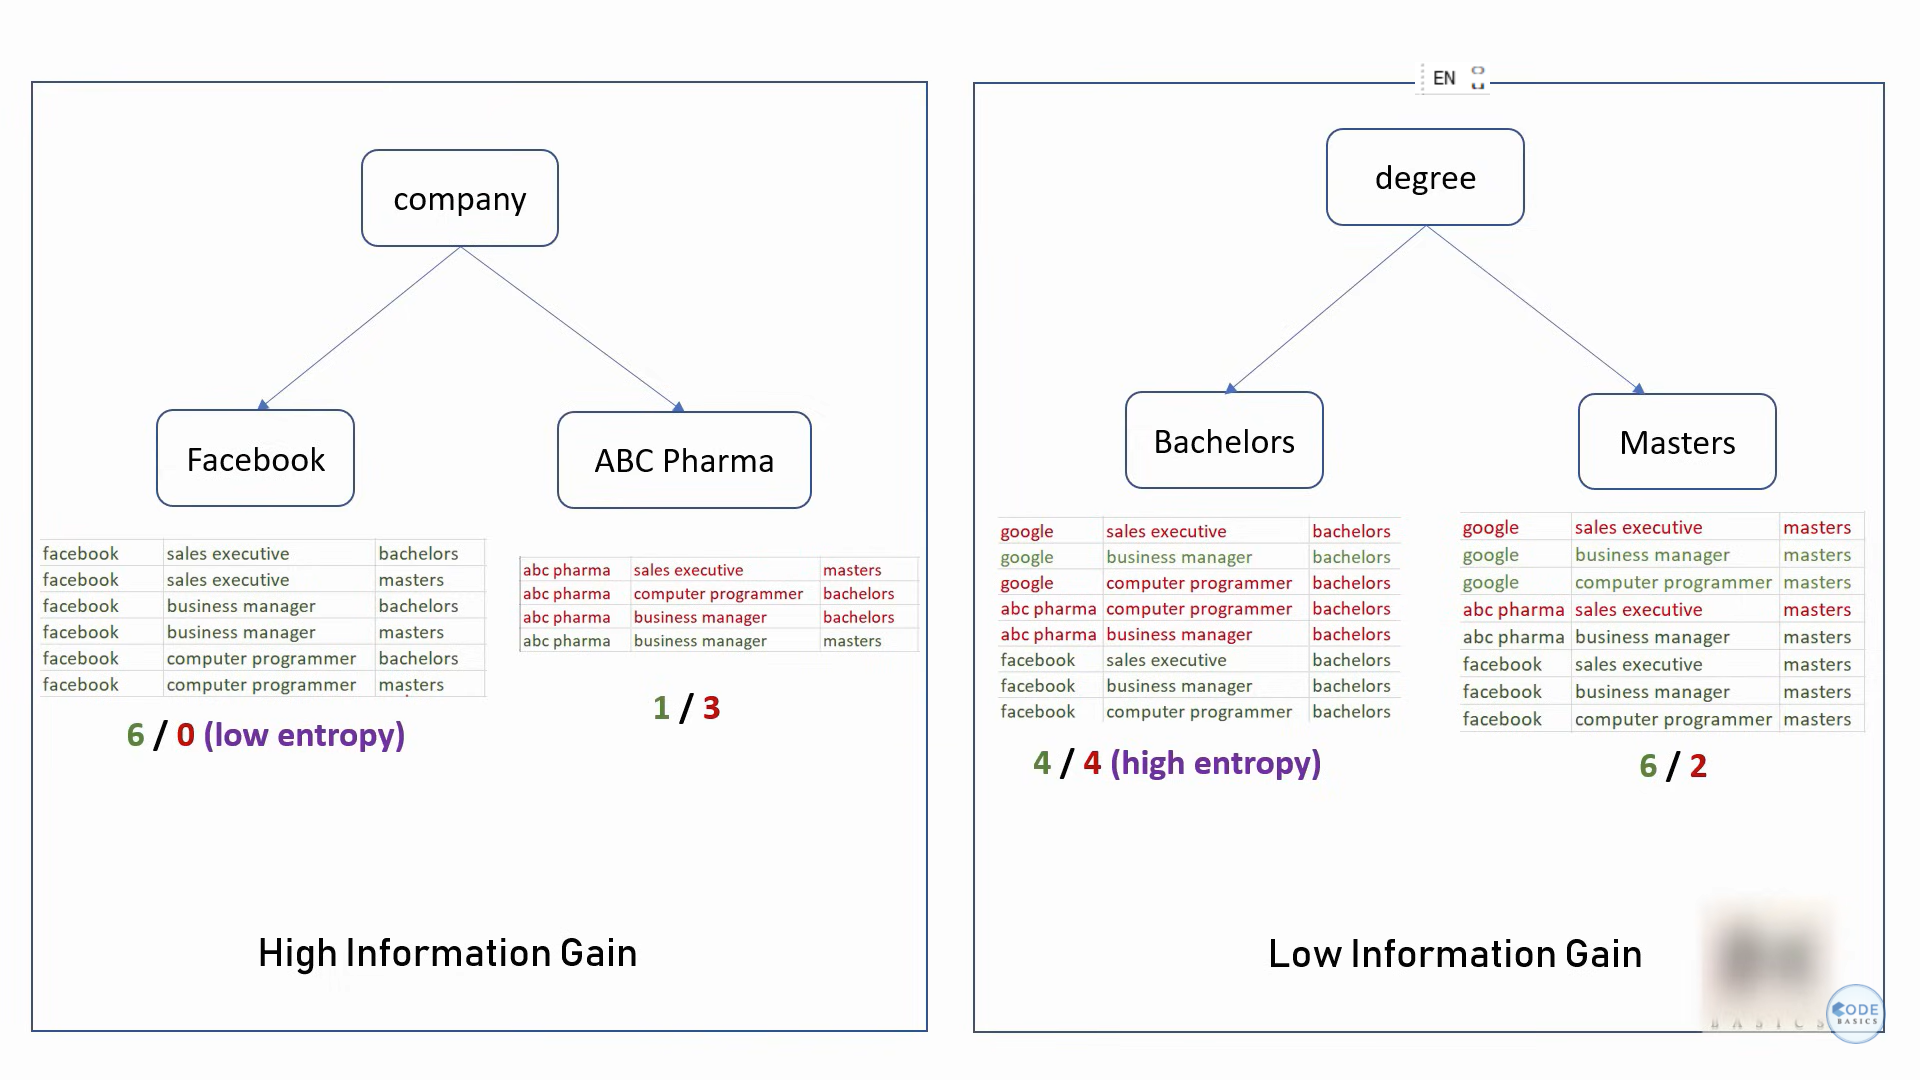
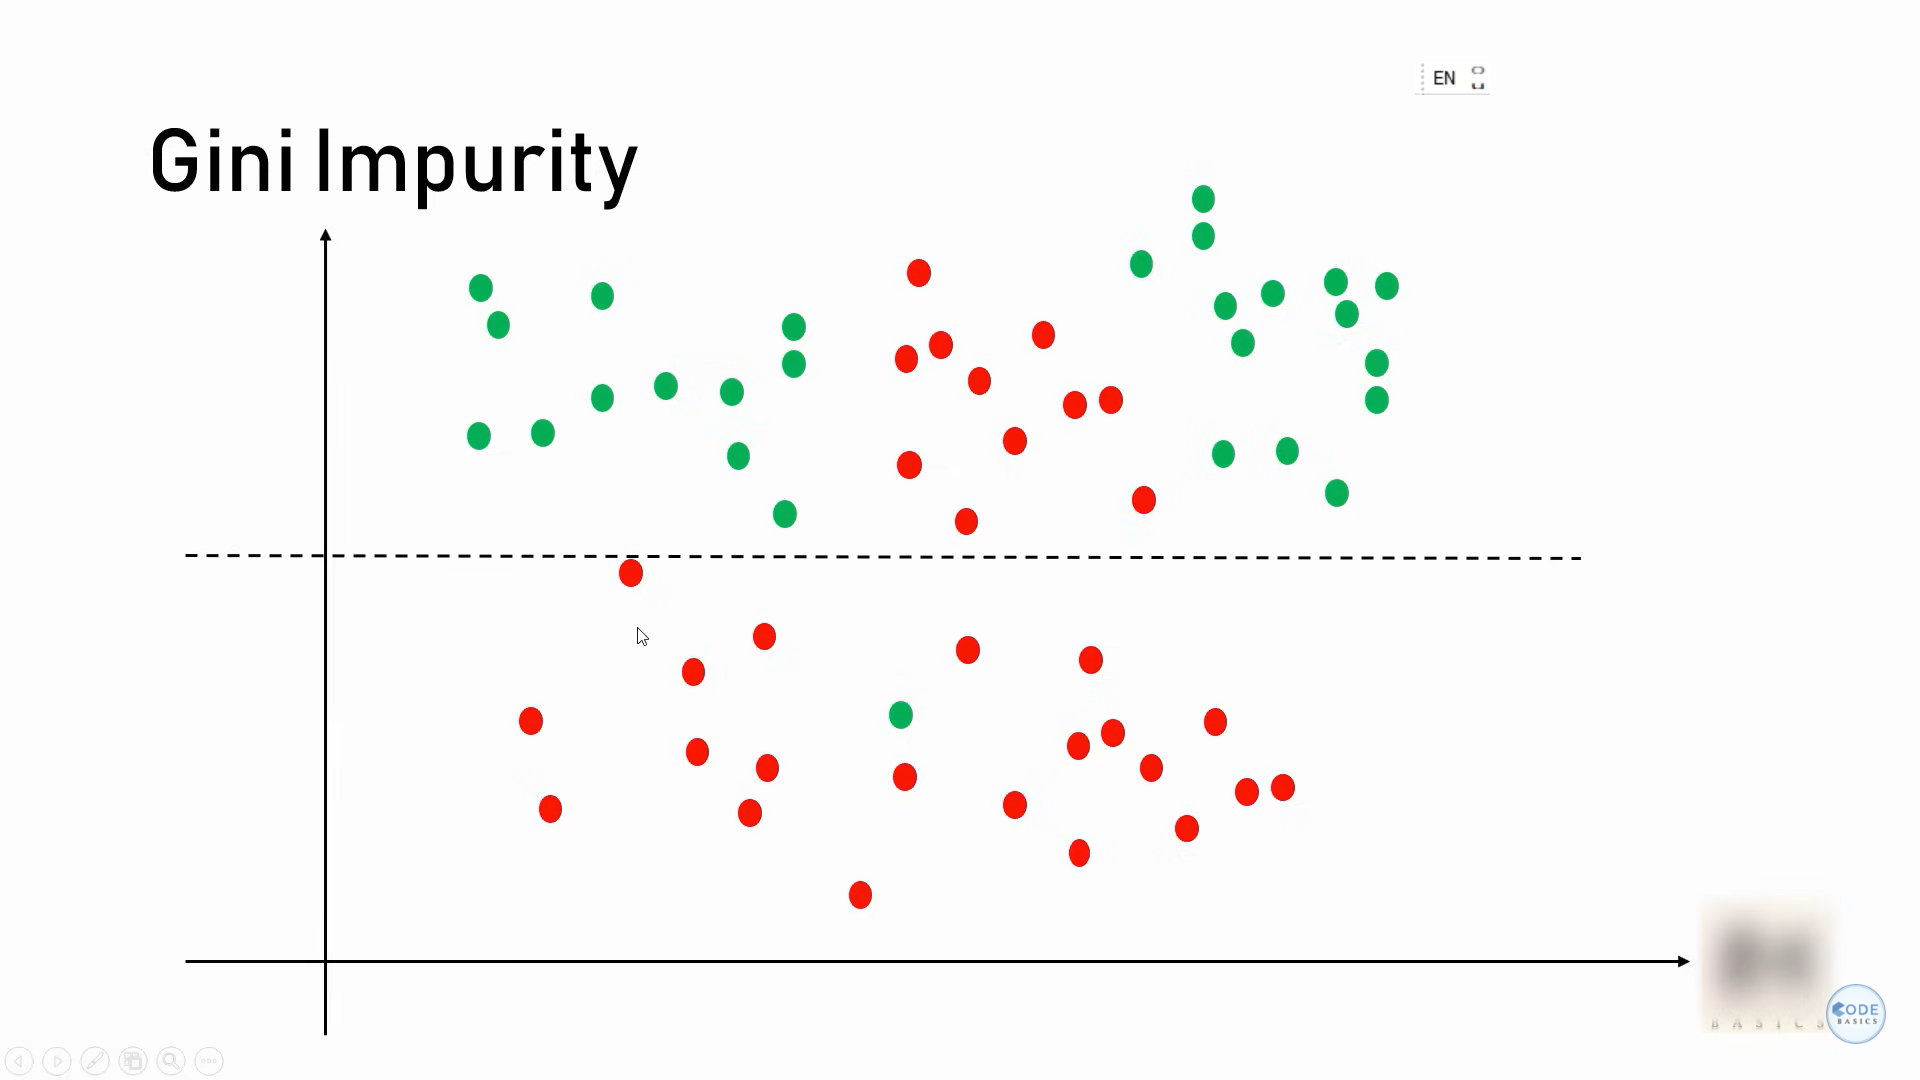

In [42]:
import pandas as pd
df = pd.read_csv('./data/salaries.csv')
df.head()

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   company                16 non-null     object
 1   job                    16 non-null     object
 2   degree                 16 non-null     object
 3   salary_more_then_100k  16 non-null     int64 
dtypes: int64(1), object(3)
memory usage: 644.0+ bytes


In [44]:
inputs = df.drop('salary_more_then_100k', axis='columns')
inputs

,company,job,degree
0,google,sales executive,bachelors
1,google,sales executive,masters
2,google,business manager,bachelors
3,google,business manager,masters
4,google,computer programmer,bachelors
5,google,computer programmer,masters
6,abc pharma,sales executive,masters
7,abc pharma,computer programmer,bachelors
8,abc pharma,business manager,bachelors
9,abc pharma,business manager,masters


In [45]:
target = df['salary_more_then_100k']
target

0     0
1     0
2     1
3     1
4     0
5     1
6     0
7     0
8     0
9     1
10    1
11    1
12    1
13    1
14    1
15    1
Name: salary_more_then_100k, dtype: int64

In [46]:
from sklearn.preprocessing import LabelEncoder
le_company = LabelEncoder()
le_job = LabelEncoder()
le_degree = LabelEncoder()


#### Data Engineering

In [48]:
inputs['company_n'] = le_company.fit_transform(inputs.company)
inputs['job_n'] = le_company.fit_transform(inputs.job)
inputs['degree_n'] = le_company.fit_transform(inputs.degree)
inputs.head()

,company,job,degree,company_n,job_n,degree_n
0,google,sales executive,bachelors,2,2,0
1,google,sales executive,masters,2,2,1
2,google,business manager,bachelors,2,0,0
3,google,business manager,masters,2,0,1
4,google,computer programmer,bachelors,2,1,0


In [49]:
inputs_n = inputs.drop(['job', 'degree', 'company'], axis='columns')
inputs_n.head()

,company_n,job_n,degree_n
0,2,2,0
1,2,2,1
2,2,0,0
3,2,0,1
4,2,1,0


#### Try Building and Training Model

In [52]:
from sklearn import tree
model = tree.DecisionTreeClassifier()
model.fit(inputs_n, target)

DecisionTreeClassifier()

In [53]:
model.score(inputs_n, target)

1.0

In [54]:
# Is salary of Google, Computer Engineer, Bachelors degree > 100 k ?

model.predict([[2,1,0]])

d:\Users\Sean\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [55]:
# Is salary of Google, Computer Engineer, Masters degree > 100 k ?
model.predict([[2,1,1]])


d:\Users\Sean\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

#### Build, Train Use Model

In [75]:
# Split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(inputs_n, target, test_size=0.2, random_state=1)

In [76]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [77]:
model.predict(X_test)

array([1, 1, 0, 0])

In [78]:
model.score(X_test, y_test)

0.75

In [80]:
print(f'X_test::\n{X_test}\n\ny_test::\n{y_test}')

X_test::
    company_n  job_n  degree_n
3           2      0         1
13          1      0         1
7           0      1         0
2           2      0         0

y_test::
3     1
13    1
7     0
2     1
Name: salary_more_then_100k, dtype: int64
